In [92]:
ist_count={}
perc = ''
for i in range(1,404):
    doc=open(perc+'/tupling_BGLErrorLog_200/tuple_'+str(i))
    ist_count[i]=len(doc.readlines())

In [1]:
import matplotlib.pylab as plt
import pandas as pd

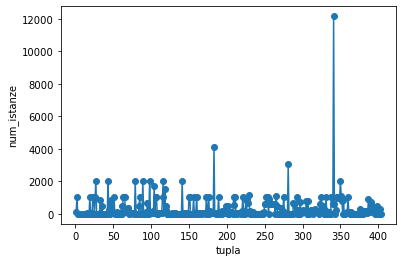

massimo num istanze: tuple_341 - totale istanze: 12152
massimo num istanze: tuple_183 - totale istanze: 4096
massimo num istanze: tuple_281 - totale istanze: 3071
massimo num istanze: tuple_27 - totale istanze: 2048
massimo num istanze: tuple_43 - totale istanze: 2048
massimo num istanze: tuple_79 - totale istanze: 2048


In [87]:
# A VALLE DELL'ESECUZIONE VENGONO ELIMINATE DELLE TUPLE, PER PROSEGUIRE E' NECESSARIO RILEGGERE IL FILE DI LOG

tpl_num = ist_count.items()
tpl_num = sorted(tpl_num)
x, y = zip(*tpl_num)

plt.plot(x,y, marker='o')
plt.xlabel("tupla")
plt.ylabel("num_istanze")
plt.show()


for i in range(0,6):
    max_key = max(ist_count, key = ist_count.get)
    print("massimo num istanze: tuple_" + str(max_key)+ " - totale istanze: "+str(ist_count[max_key]))
    ist_count.pop(max_key)

In [93]:
for i in range(340,345):
    print("Tupla " + str(i)+": "+str(ist_count[i]))
    
tot_entry = 0
for j in ist_count:
    tot_entry =tot_entry + ist_count[j]
print(tot_entry)

Tupla 340: 624
Tupla 341: 12152
Tupla 342: 624
Tupla 343: 8
Tupla 344: 248
125624


In [94]:
# Calcolo percentuale istanze nelle tuple tra 298 e 331
somma = 0
for i in range(340,345):
    somma = somma + ist_count[i]

perc = somma/tot_entry*100
print("somma: "+str(somma))
print("le istanze da 340 a 345 coprono il "+str(perc)+ "% di tutte le istanze")

somma: 13656
le istanze da 340 a 345 coprono il 10.87053429281029% di tutte le istanze


In [112]:
import pandas as pd

df_ist = pd.DataFrame(list(ist_count.items()),columns=['Tupla', 'Num_Istanze'])

In [118]:
df_ist

,Tupla,Num_Istanze
0,1,6
1,2,3
2,3,61
3,4,14
4,5,2
...,...,...
503,504,2
504,505,2
505,506,4
506,507,562


In [119]:
max_ = 0
for i in range(0, len(df_ist)):
    if max_< df_ist['Num_Istanze'].values[i]:
        max_ = df_ist['Num_Istanze'].values[i]
        
print("massimo num di istanze: "+ str(max_))

massimo num di istanze: 9825


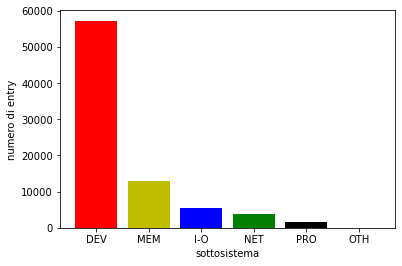

In [18]:
# lettura del file di statistiche totali 

perc = ''

import matplotlib.pylab as plt
import pandas as pd

with open(perc+'/Stat_tot_Merc.txt') as f:
    data = [_.rstrip('\n') for _ in f.readlines()[5:11]]

stat_cat = {}

for i in range(len(data)):
    stat = data[i].split(' ')
    stat_cat[stat[0]] = int(stat[1])

cat = stat_cat.items()
x, y = zip(*cat)

plt.bar(x,y, color=['r', 'y', 'b', 'g', 'k'])
plt.xlabel("sottosistema")
plt.ylabel("numero di entry")
plt.show()



In [46]:
p = statistics['tg-c401']/tot_entry*100
print("percetuale istanze di tg-c401: "+str(p)+" %")

percetuale istanze di tg-c401: 77.10193682439953 %


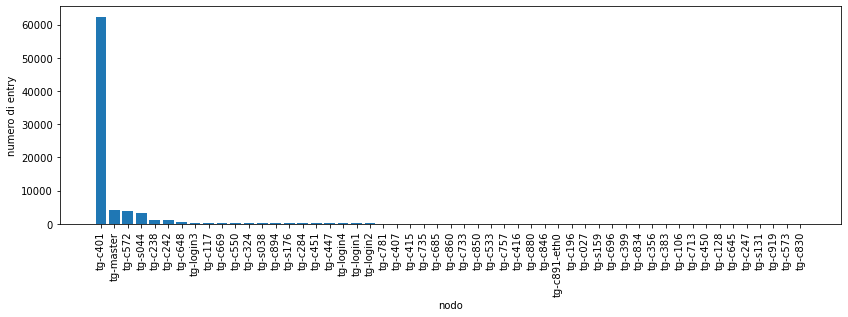

In [27]:
perc = ''

import matplotlib.pylab as plt
import pandas as pd

with open(perc+'/Stat_complete_Merc.txt') as f:
    data = [_.rstrip('\n') for _ in f.readlines()[13:66]]
    
stat_cat = {}

for i in range(len(data)):
    stat = data[i].split(' ')
    stat_cat[stat[0]] = int(stat[1])

cat = stat_cat.items()
x, y = zip(*cat)

plt.figure(figsize=(14,4))
plt.bar(x,y)
plt.xlabel("nodo")
plt.xticks(rotation=90)
plt.ylabel("numero di entry")
plt.show()

Log file has 80854 entries and 5 columns.


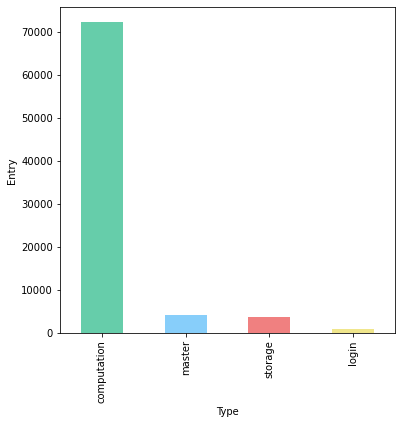

In [37]:
# raggruppo per tipo di nodo
df_mercury = pd.read_csv(perc+'/MercuryErrorLog.txt', names = ['Timestamp', 'Node', 'Subsystem', 'Message'])

df_mercury.loc[:,'Node'] = df_mercury.loc[:,'Timestamp'].str.split(' ', n=3).str[1]
df_mercury.loc[:,'Subsystem'] = df_mercury.loc[:,'Timestamp'].str.split(' ', n=3).str[2]
df_mercury.loc[:,'Message'] = df_mercury.loc[:,'Timestamp'].str.split(' ', n=3).str[3]
df_mercury.loc[:,'Timestamp'] = df_mercury.loc[:,'Timestamp'].str.split(' ', n=3).str[0]

df_mercury.loc[df_mercury['Node'].str.contains('login'), 'Type'] = 'login'
df_mercury.loc[df_mercury['Node'].str.contains('c'), 'Type'] = 'computation'
df_mercury.loc[df_mercury['Node'].str.contains('s'), 'Type'] = 'storage'
df_mercury.loc[df_mercury['Node'].str.contains('master'), 'Type'] = 'master'

print('Log file has ' + str(df_mercury.shape[0]) + ' entries and ' + str(df_mercury.shape[1]) + ' columns.')
df_mercury.head()

plt.figure(figsize=(6,6))
df_mercury.groupby(by=['Type']).Timestamp.count().sort_values(ascending = False).plot.bar(
    color=['mediumaquamarine','lightskyblue','lightcoral','khaki'])
plt.ylabel('Entry')
plt.show()

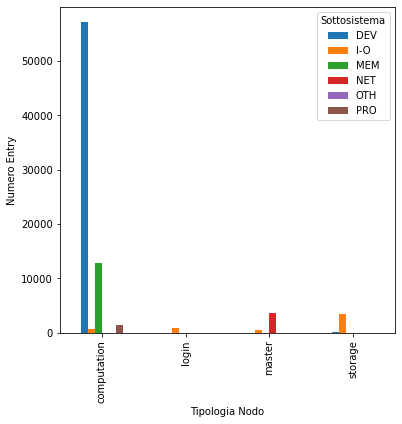

In [44]:
df_mercury.groupby(by=['Subsystem','Type']).Timestamp.count().unstack(0).plot.bar(figsize=(6,6))
plt.legend(title='Sottosistema')
plt.xlabel('Tipologia Nodo')
plt.ylabel('Numero Entry')
plt.show()

In [84]:
perc = ''

df_mask_comp=df_mercury['Type']=='computation'
df_comp = df_mercury[df_mask_comp]
df_comp = df_comp.drop(columns='Type')
df_comp.to_csv(perc+'/MercuryComputation.txt', index=False, header=False, sep=' ')

df_mask_master=df_mercury['Type']=='master'
df_master = df_mercury[df_mask_master]
df_master = df_master.drop(columns='Type')
df_master.to_csv(perc+'/MercuryMaster.txt', index=False, header=False, sep=' ')

df_mask_login=df_mercury['Type']=='login'
df_login = df_mercury[df_mask_login]
df_login = df_login.drop(columns='Type')
df_login.to_csv(perc+'/MercuryLogin.txt', index=False, header=False, sep=' ')

df_mask_storage=df_mercury['Type']=='storage'
df_storage = df_mercury[df_mask_storage]
df_storage = df_storage.drop(columns='Type')
df_storage.to_csv(perc+'/MercuryStorage.txt', index=False, header=False, sep=' ')

# BLUE GENE L

In [2]:
perc = ''

df_bgl = pd.read_csv(perc+'/BGLErrorLog.txt', names = ['Timestamp', 'ID-Node','Rack', 'Midplane', 'Node', 'Card', 'Card type', 'Message'])

df_bgl.loc[:,'ID-Node'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[1]

df_bgl.loc[:,'Rack'] = df_bgl.loc[:,'ID-Node'].str.split('-', n=2).str[0]
df_bgl.loc[:,'Midplane'] = df_bgl.loc[:,'ID-Node'].str.split('-', n=2).str[1]
df_bgl.loc[:,'Node'] = df_bgl.loc[:,'ID-Node'].str.split('-', n=2).str[2]

df_bgl.loc[:,'Card'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[2]

df_bgl.loc[df_bgl['Card'].str.contains('J18'),'Card type'] = 'I-O'
df_bgl.loc[~df_bgl['Card'].str.contains('J18'),'Card type'] = 'computation'


df_bgl.loc[:,'Message'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[3].str.strip()
df_bgl.loc[:,'Timestamp'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[0]

print('Log file has ' + str(df_bgl.shape[0]) + ' entries and ' + str(df_bgl.shape[1]) + ' columns.')

C:\Users\domyb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Log file has 125624 entries and 8 columns.


In [7]:
from tqdm import tnrange
from tqdm import tqdm_notebook as tqdmn
import os

def tupling(dataframe, c_win, filepath):
    if(not os.path.isfile(filepath)):
        print('Creating file', filepath, 'this may take a while...\n')
        
        tup = 0
        prev = int(dataframe.loc[0,'Timestamp'])
        dataframe.loc[0,'Tuple'] = 0

        for index in tqdmn(range(dataframe.shape[0]-1)):
            succ = int(dataframe.loc[index+1,'Timestamp'])
            if  succ - prev >= c_win:
                tup = tup + 1
            dataframe.loc[index+1,'Tuple'] = tup
            prev = succ
            
        dataframe.to_csv(filepath)

    else:
        print('File already exists!\n')
        dataframe = pd.read_csv(filepath, index_col = 0)
    
    return dataframe

In [8]:
#df_bgl = tupling(df_bgl, 200, perc+'/prova_tuple_python.txt')
#df_bgl = df_bgl.astype({'Timestamp' : 'int32', 'Tuple' : 'int32'})

File already exists!



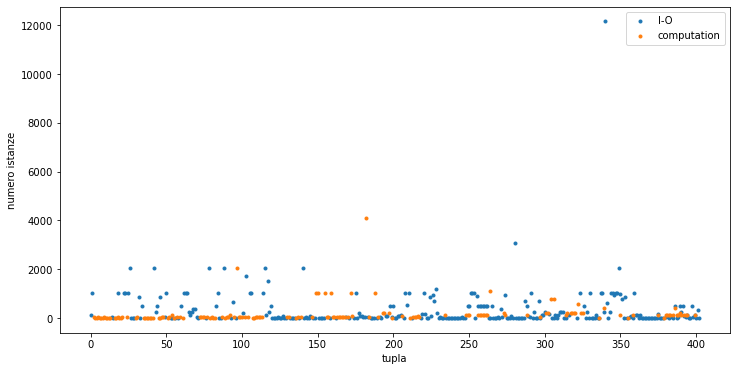

In [9]:
df_group = df_bgl.groupby(by=['Tuple','Card type']).count()

# cmap = cm.get_cmap('tab20')
# colors = cmap.colors

fig, ax = plt.subplots(figsize=(12,6))
# ax.set_prop_cycle(color=colors)

for card in df_bgl['Card type'].unique():
    df_temp = df_group[df_group.index.get_level_values('Card type').isin([card])]
    
    x = df_temp.index.get_level_values(0)
    y = df_temp['Timestamp']
    plt.scatter(x,y, label=card, marker = '.')

    
plt.legend()
plt.xlabel('tupla')
plt.ylabel('numero istanze')
plt.show()

In [10]:
df_gruppo = df_bgl.groupby(by='Card type').count()

percent_io = df_gruppo.iloc[0,0]/df_bgl.shape[0]*100
print('percentuale istanze IO: '+ str(percent_io))
percent_comp = df_gruppo.iloc[1,1]/df_bgl.shape[0]*100
print('percentuale istanze Computazionali: '+ str(percent_comp))

percentuale istanze IO: 79.59227536139592
percentuale istanze Computazionali: 20.407724638604087


,Timestamp,ID-Node,Rack,Midplane,Node,Card,Card type,Message,Tuple
0,1128621350,R00-M0-N0,R00,M0,N0,J18-U01,I-O,Lustre mount FAILED : bglio2 : block_id : loca...,0
1,1128621350,R01-M1-N0,R01,M1,N0,J18-U11,I-O,Lustre mount FAILED : bglio21 : block_id : loc...,0
2,1128621351,R07-M0-NC,R07,M0,NC,J18-U01,I-O,Lustre mount FAILED : bglio124 : block_id : lo...,0
3,1128621351,R00-M0-N4,R00,M0,N4,J18-U01,I-O,Lustre mount FAILED : bglio4 : block_id : loca...,0
4,1128621351,R02-M0-N4,R02,M0,N4,J18-U01,I-O,Lustre mount FAILED : bglio36 : block_id : loc...,0
...,...,...,...,...,...,...,...,...,...
125619,1136390405,R00-M0-NC,R00,M0,NC,J18-U11,I-O,idoproxy communication failure: socket closed,402
125620,1136390405,R36-M0-NC,R36,M0,NC,J18-U11,I-O,idoproxy communication failure: socket closed,402
125621,1136390405,R30-M0-NC,R30,M0,NC,J18-U11,I-O,idoproxy communication failure: socket closed,402
125622,1136390405,R31-M0-NC,R31,M0,NC,J18-U11,I-O,idoproxy communication failure: socket closed,402


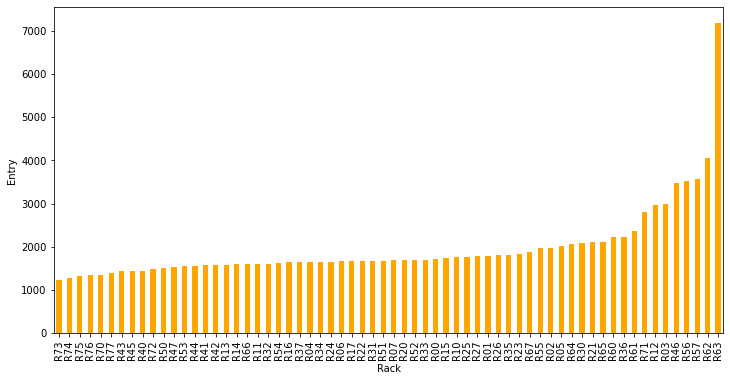

In [36]:
plt.figure(figsize=(12,6))
df_bgl.groupby(by='Rack').Timestamp.count().sort_values().plot.bar(color='orange')
plt.xticks(rotation=90)
plt.ylabel('Entry')
plt.show()

In [54]:
df_rack = df_bgl.groupby(by='Rack').count()
df_rack.sort_values(by='Timestamp')

print(df_rack['Timestamp'].sum())
#print(df_rack[df_rack.Rack==['R63','R62','R57','R56','R46', 'R03']].sum())

rack = [62,61,56,55,45,2]
rack_s = ['R63','R62','R57','R56','R46', 'R03']

df_rack_filt = pd.DataFrame()
for r in rack:
    df_rack_filt[0]=df_rack.iloc(r)

125624


ValueError: No axis named 62 for object type DataFrame

In [55]:
n = 8 
top_rack = df_bgl.groupby(by=['Rack']).Timestamp.count().sort_values(ascending=False)[0:n].index

df_top_rack = df_bgl.loc[df_bgl['Rack'] == top_rack[0]]
for r in range(1,n):
    df_top_rack = df_top_rack.append(df_bgl.loc[df_bgl['Rack'] == top_rack[r]])

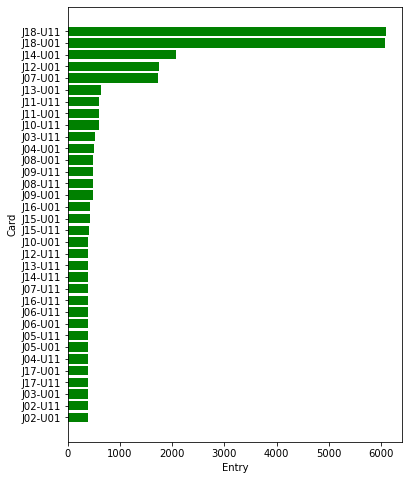

In [83]:
df_rack_card = df_top_rack.groupby(by='Card').count().sort_values(by='Timestamp')

x=df_rack_card.index.get_level_values(0)
y=df_rack_card['Timestamp']

plt.figure(figsize=(6,8))
plt.barh(x,y, color='green')
plt.xlabel('Entry')
plt.ylabel('Card')
plt.show()

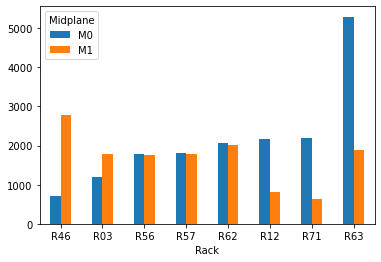

In [72]:
df_top_rack.groupby(by=['Rack', 'Midplane']).Timestamp.count().unstack(1).sort_values(by='M0').plot.bar(figsize=(6,4))
plt.xticks(rotation=0)
plt.show()

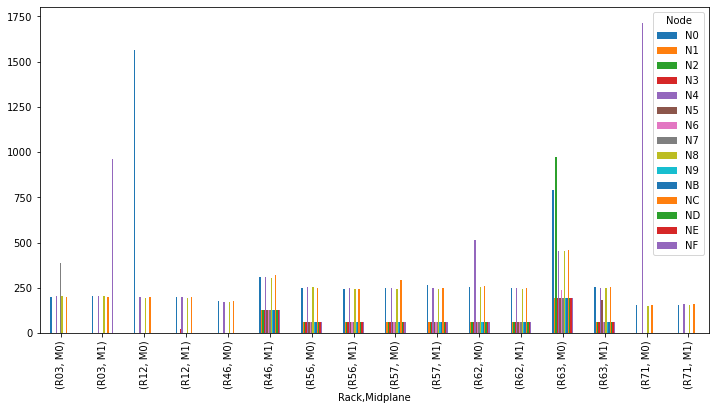

In [87]:
df_top_rack.groupby(by=['Rack', 'Midplane', 'Node']).Timestamp.count().unstack(2).plot.bar(figsize=(12,6))
plt.show()

In [ ]:
df_temp = df_top_rack.groupby(by=['Rack', 'Midplane', 'Node']).Timestamp.count().unstack(2)

df_temp = df_temp.fillna(0)

In [118]:
import numpy as np

c_wins = np.delete(np.arange(0,500,1), 0)

for rack in top_rack:
    df_temp = df_bgl.loc[df_bgl['Rack'] == rack]
    df_temp.reset_index(drop = True, inplace = True)
    
    del df_temp['Rack']
    del df_temp['Midplane']
    del df_temp['Node']
    del df_temp['Tuple']
    del df_temp['Card type']
    filepath = perc+'/BGL-' + rack + '-Sensitivity.txt'
    df_temp.to_csv(filepath, index=False, sep=' ', header=False)
    
df_temp

,Timestamp,ID-Node,Card,Message
0,1128641357,R71-M1-NC,J18-U11,ciod: Error reading message prefix after LOGIN...
1,1128641357,R71-M1-NC,J18-U01,ciod: Error reading message prefix after LOGIN...
2,1128641360,R71-M1-N8,J18-U11,ciod: Error reading message prefix after LOGIN...
3,1128641360,R71-M1-N8,J18-U01,ciod: Error reading message prefix after LOGIN...
4,1128641362,R71-M1-N4,J18-U11,ciod: Error reading message prefix after LOGIN...
...,...,...,...,...
2810,1136322640,R71-M1-N8,J18-U11,Lustre mount FAILED : bglio925 : block_id : lo...
2811,1136322652,R71-M1-N4,J18-U11,Lustre mount FAILED : bglio919 : block_id : lo...
2812,1136322652,R71-M0-NC,J18-U11,Lustre mount FAILED : bglio923 : block_id : lo...
2813,1136322654,R71-M0-N0,J18-U01,Lustre mount FAILED : bglio914 : block_id : lo...


<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


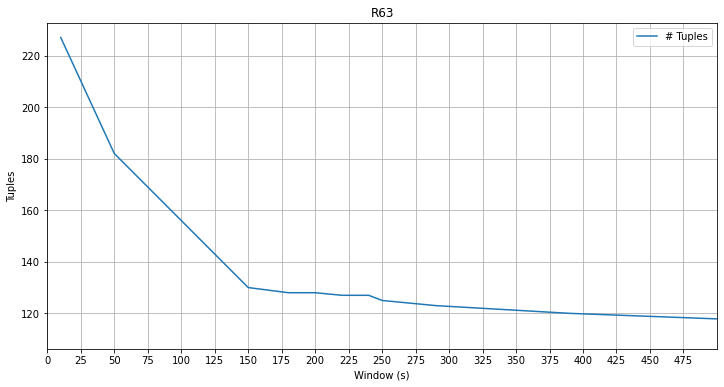

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


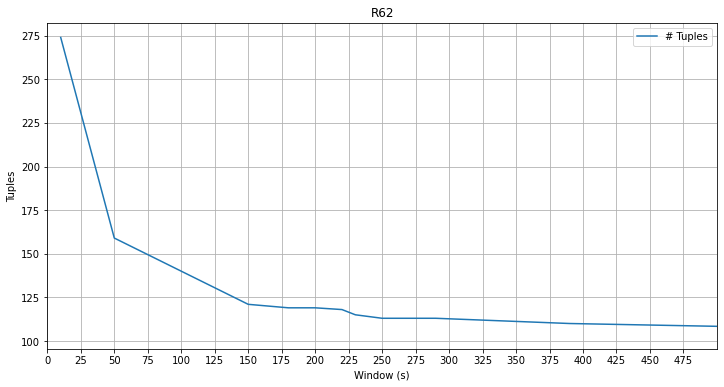

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


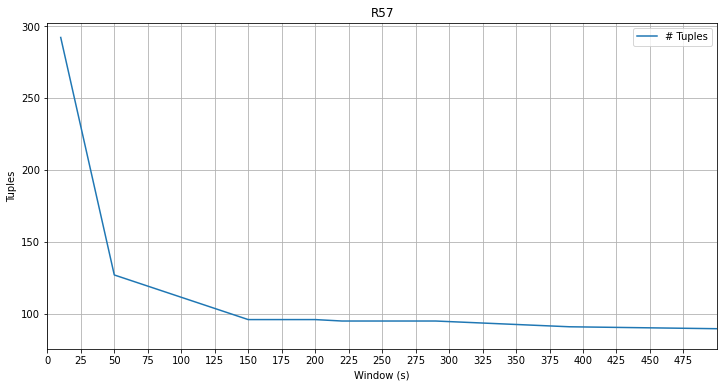

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


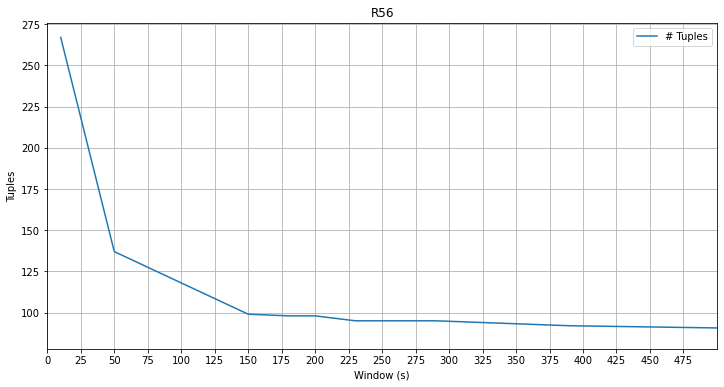

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


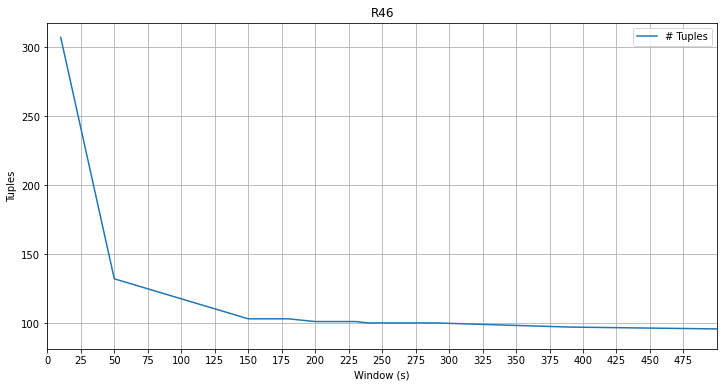

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


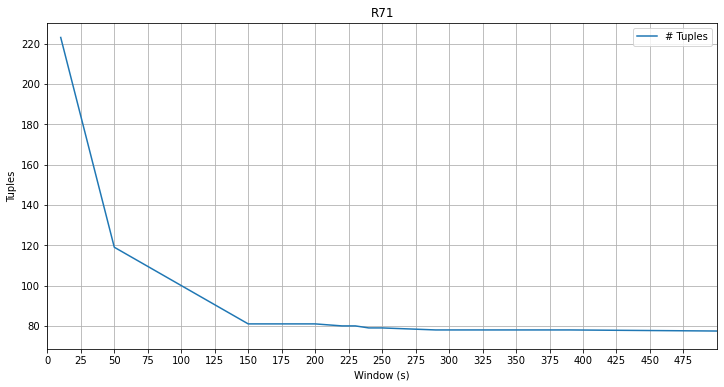

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


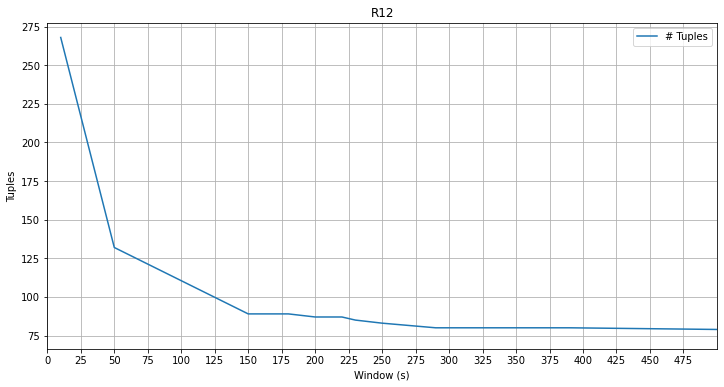

<ipython-input-3-f052d3650ff0>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])


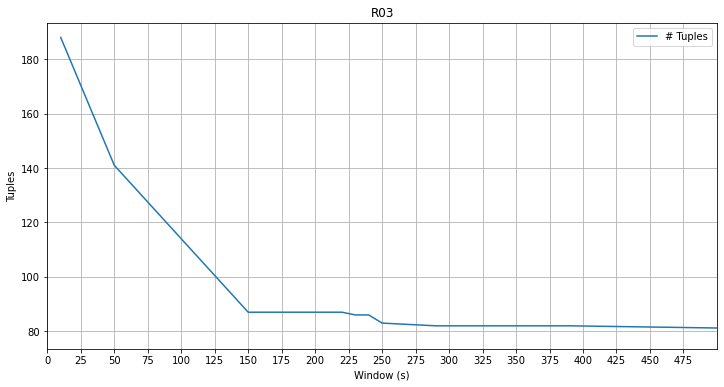

In [3]:
import pandas as pd
import numpy as np

perc = ''

Rk_list = ['R63', 'R62', 'R57', 'R56', 'R46', 'R71', 'R12', 'R03']

df_tot = pd.DataFrame()

for rack in Rk_list:
    filepath = perc+'/tupleCount-BGL-' + rack + '-Sensitivity.txt'
    labelW = str('Window'+rack)
    labelR = str('Tuple'+rack)
    df_temp_sensitivity = pd.read_csv(filepath, sep='  ', names=[labelW, labelR])
    df_tot = pd.concat([df_tot, df_temp_sensitivity], axis=1)
    x = df_temp_sensitivity[labelW]
    y = df_temp_sensitivity[labelR]
    plt.figure(figsize=(12,6))
    plt.plot(x, y, label = '# Tuples')
    plt.title(rack)
    plt.xlim(0,500)
    plt.xticks(np.arange(0, 500, step = 25))
    plt.xlabel('Window (s)')
    plt.ylabel('Tuples')
    plt.legend()
    plt.grid()
    plt.show()

In [4]:
df_tot

,WindowR63,TupleR63,WindowR62,TupleR62,WindowR57,TupleR57,WindowR56,TupleR56,WindowR46,TupleR46,WindowR71,TupleR71,WindowR12,TupleR12,WindowR03,TupleR03
0,10,227,10,274,10,292,10,267,10,307,10,223,10,268,10,188
1,50,182,50,159,50,127,50,137,50,132,50,119,50,132,50,141
2,150,130,150,121,150,96,150,99,150,103,150,81,150,89,150,87
3,180,128,180,119,180,96,180,98,180,103,180,81,180,89,180,87
4,200,128,200,119,200,96,200,98,200,101,200,81,200,87,200,87
5,220,127,220,118,220,95,220,96,220,101,220,80,220,87,220,87
6,230,127,230,115,230,95,230,95,230,101,230,80,230,85,230,86
7,240,127,240,114,240,95,240,95,240,100,240,79,240,84,240,86
8,250,125,250,113,250,95,250,95,250,100,250,79,250,83,250,83
9,290,123,290,113,290,95,290,95,290,100,290,78,290,80,290,82


In [5]:
del df_tot['WindowR62']
del df_tot['WindowR57']
del df_tot['WindowR56']
del df_tot['WindowR46']

In [7]:
del df_tot['WindowR71']
del df_tot['WindowR12']
del df_tot['WindowR03']
df_tot

,WindowR63,TupleR63,TupleR62,TupleR57,TupleR56,TupleR46,TupleR71,TupleR12,TupleR03
0,10,227,274,292,267,307,223,268,188
1,50,182,159,127,137,132,119,132,141
2,150,130,121,96,99,103,81,89,87
3,180,128,119,96,98,103,81,89,87
4,200,128,119,96,98,101,81,87,87
5,220,127,118,95,96,101,80,87,87
6,230,127,115,95,95,101,80,85,86
7,240,127,114,95,95,100,79,84,86
8,250,125,113,95,95,100,79,83,83
9,290,123,113,95,95,100,78,80,82


In [8]:
#df_tot.rename(columns={'WindowR63':'Window'})
df_tot.columns = df_tot.columns.str.replace('WindowR63', 'Window')
df_tot

,Window,TupleR63,TupleR62,TupleR57,TupleR56,TupleR46,TupleR71,TupleR12,TupleR03
0,10,227,274,292,267,307,223,268,188
1,50,182,159,127,137,132,119,132,141
2,150,130,121,96,99,103,81,89,87
3,180,128,119,96,98,103,81,89,87
4,200,128,119,96,98,101,81,87,87
5,220,127,118,95,96,101,80,87,87
6,230,127,115,95,95,101,80,85,86
7,240,127,114,95,95,100,79,84,86
8,250,125,113,95,95,100,79,83,83
9,290,123,113,95,95,100,78,80,82


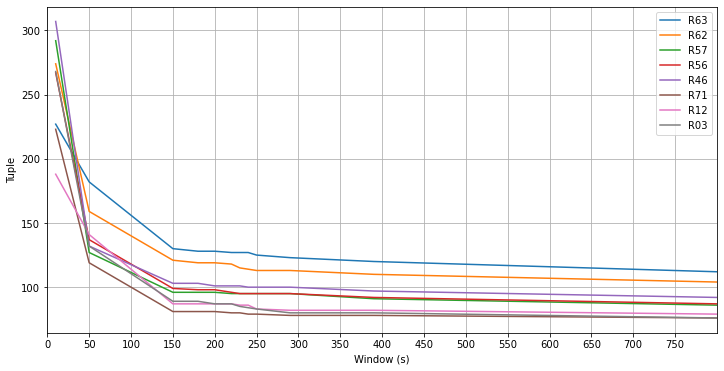

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df_tot['Window'], df_tot['TupleR63'],
         df_tot['Window'],df_tot['TupleR62'],
         df_tot['Window'],df_tot['TupleR57'],
         df_tot['Window'],df_tot['TupleR56'],
         df_tot['Window'], df_tot['TupleR46'],
         df_tot['Window'], df_tot['TupleR71'],
         df_tot['Window'], df_tot['TupleR03'],
         df_tot['Window'], df_tot['TupleR12'])
plt.legend(Rk_list)
plt.grid()
plt.xlim(0,800)
plt.xticks(np.arange(0, 800, step = 50))
plt.xlabel('Window (s)')
plt.ylabel('Tuple')
plt.show()

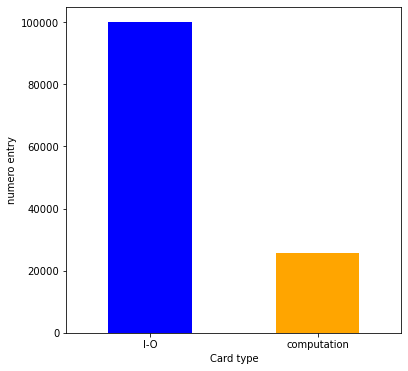

In [22]:
df_bgl.groupby(by='Card type').Timestamp.count().plot.bar(figsize=(6,6),color=['blue','orange'])
plt.xticks(rotation=0)
plt.ylabel('numero entry')
plt.show()

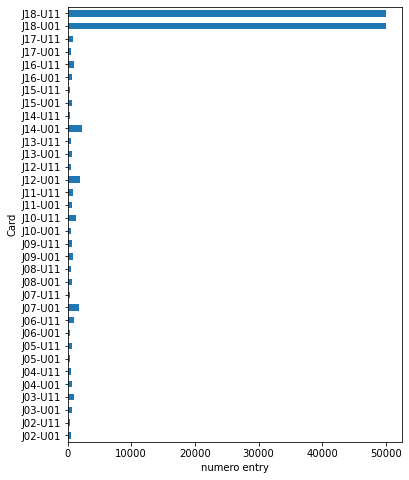

In [35]:
df_bgl.groupby(by='Card').Timestamp.count().plot.barh(figsize=(6,8))
plt.xlabel('numero entry')
plt.show()

In [43]:
perc = ''

df_io = df_bgl.loc[df_bgl['Card type']=='I-O']
df_comp = df_bgl.loc[df_bgl['Card type']=='computation']
del df_comp['Rack']
del df_comp['Midplane']
del df_comp['Node']
del df_comp['Card type']

del df_io['Rack']
del df_io['Midplane']
del df_io['Node']
del df_io['Card type']

In [44]:
df_comp.to_csv(perc+'/BGL-error-computation.txt', index=False, sep=' ', header=False)
df_io.to_csv(perc+'/BGL-error-io.txt', index=False, sep=' ', header=False)

In [45]:
df_comp

,Timestamp,ID-Node,Card,Message
1152,1128702415,R61-M1-N2,J10-U11,machine check interrupt (bit=0x06): L3 major i...
1153,1128702415,R61-M1-N2,J10-U11,instruction address: 0x0023d060
1154,1128702416,R61-M1-N2,J10-U11,machine check status register: 0xa0000000
1155,1128702416,R61-M1-N2,J10-U11,summary...........................1
1156,1128702416,R61-M1-N2,J10-U11,instruction plb error.............0
...,...,...,...,...
125148,1136287504,R27-M0-NA,J11-U11,fpr28=0xffffffff ffffffff d2f1a9fc 3f30624d
125149,1136287505,R27-M0-NA,J11-U11,fpr29=0xffffffff ffffffff 00000000 00000000
125150,1136287505,R27-M0-NA,J11-U11,fpr30=0xffffffff ffffffff 00000000 00000000
125151,1136287505,R27-M0-NA,J11-U11,fpr31=0xffffffff ffffffff 00000000 00000000
